In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("HRDataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
dup=pd.DataFrame(df.duplicated())
dup.head

<bound method NDFrame.head of            0
0      False
1      False
2      False
3      False
4      False
...      ...
14994   True
14995   True
14996   True
14997   True
14998   True

[14999 rows x 1 columns]>

In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [16]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<Figure size 432x288 with 0 Axes>

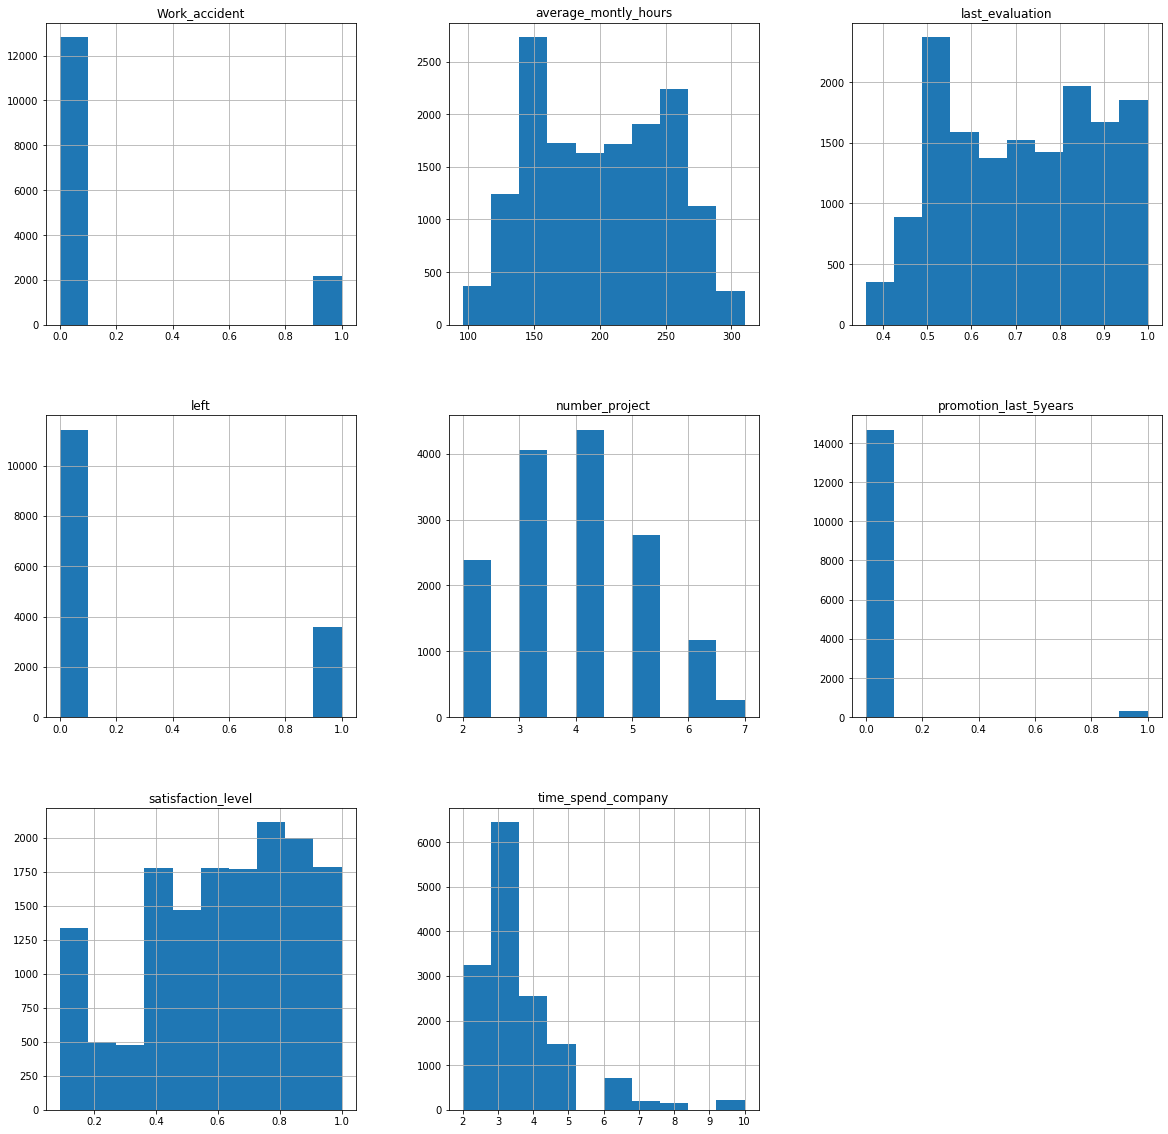

In [25]:
plt.figure()
df.hist(figsize=(20,20))
plt.show()

In [29]:
df=df.drop_duplicates()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
left=df[df.left==1]
left.shape

(1991, 10)

In [31]:
retain=df[df.left==0]
retain.shape

(10000, 10)

In [32]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


### Employee retention getting impacted by following variables:-
1.Satisfaction_level	
2.average_montly_hours	
3.promotion_last_5years
4.Salary

## impact of Salary on retention

In [33]:
i_sal=pd.crosstab(df.salary,df.left)
i_sal

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


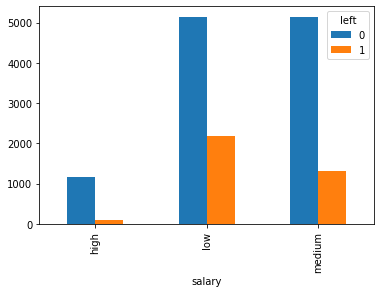

In [19]:
i_sal.plot(kind='bar')

##### Employee with high salary are not likely to change jobs in comparison of others.

## Department Wise Employee Retention Rate

In [34]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


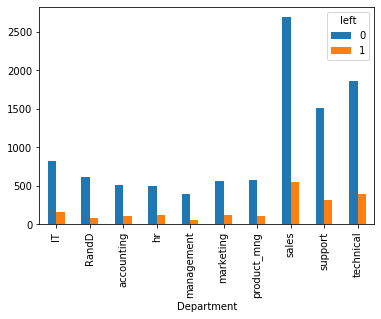

In [35]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

##### As we can see departments are not highly impacting 

In [36]:
newdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [37]:
dumm=pd.get_dummies(newdf.salary,prefix="sal")
dumm.head()

,sal_high,sal_low,sal_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [38]:
finaldf=pd.concat([newdf,dumm],axis='columns')
finaldf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,sal_high,sal_low,sal_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [39]:
final_df=finaldf.drop(['salary','sal_medium'], axis='columns')
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,sal_high,sal_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [40]:
x=final_df
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,sal_high,sal_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [41]:
y=df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.3)

In [43]:
xtest.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,sal_high,sal_low
6465,0.65,182,0,0,1
2322,0.77,171,0,0,0
5096,0.73,148,0,1,0
66,0.43,153,0,0,0
4715,0.63,160,0,0,1


In [44]:
reg=LogisticRegression()
hra=reg.fit(x,y)
hra

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
xtest.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,sal_high,sal_low
6465,0.65,182,0,0,1
2322,0.77,171,0,0,0
5096,0.73,148,0,1,0
66,0.43,153,0,0,0
4715,0.63,160,0,0,1


In [46]:
hra.predict(xtest.head())

array([0, 0, 0, 0, 0], dtype=int64)

# Model Score

In [47]:
hra.score(xtest,ytest)

0.858946866809626

#### To store the model using joblib

In [48]:
from sklearn.externals import joblib
joblib.dump(hra,'HR_Data_Analytics')

C:\Users\dell\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['HR_Data_Analytics']

In [49]:
t=joblib.load('HR_Data_Analytics')
t

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
t.coef_

array([[-3.78331346e+00,  2.66535206e-03, -1.12612368e+00,
        -1.21774401e+00,  3.96824182e-01]])

In [51]:
t.intercept_

array([-0.16430248])